In [1]:
import pandas as pd
import seaborn as sn

import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
!git clone https://github.com/JkbRnc/Data_Generators.git

Cloning into 'Data_Generators'...
remote: Enumerating objects: 126, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 126 (delta 42), reused 93 (delta 25), pack-reused 0
Receiving objects: 100% (126/126), 1.09 MiB | 14.75 MiB/s, done.
Resolving deltas: 100% (42/42), done.


In [4]:
from Data_Generators.evaluate.eval import evaluate_randomforest, distance, create_statistics

In [5]:
from Data_Generators.generators.gans import GAN

# Beans dataset

In [6]:
beans = pd.read_csv('drive/MyDrive/Datasets/Dry_Bean_Dataset.csv', sep=';')

In [ ]:
beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
beans_gan = GAN(num_epochs=500, g_params=[256,256], d_params=[256,256])

In [ ]:
beans_gan.fit(beans, categorical_columns=['Class'])

Epoch: 0 Loss Discriminator: 0.4836772382259369
Epoch: 0 Loss Generator: 0.763938844203949
Epoch: 10 Loss Discriminator: 0.40003740787506104
Epoch: 10 Loss Generator: 1.9673302173614502
Epoch: 20 Loss Discriminator: 0.26625388860702515
Epoch: 20 Loss Generator: 2.7656402587890625
Epoch: 30 Loss Discriminator: 0.12231291830539703
Epoch: 30 Loss Generator: 6.14047908782959
Epoch: 40 Loss Discriminator: 0.06501613557338715
Epoch: 40 Loss Generator: 5.5012593269348145
Epoch: 50 Loss Discriminator: 0.1224774718284607
Epoch: 50 Loss Generator: 5.380167484283447
Epoch: 60 Loss Discriminator: 0.19620999693870544
Epoch: 60 Loss Generator: 5.133872032165527
Epoch: 70 Loss Discriminator: 0.05925190821290016
Epoch: 70 Loss Generator: 4.400295257568359
Epoch: 80 Loss Discriminator: 0.05941549688577652
Epoch: 80 Loss Generator: 5.291478157043457
Epoch: 90 Loss Discriminator: 0.060093533247709274
Epoch: 90 Loss Generator: 4.546974182128906
Epoch: 100 Loss Discriminator: 0.03849926218390465
Epoch: 100

In [ ]:
samples = beans_gan.sample(10000)

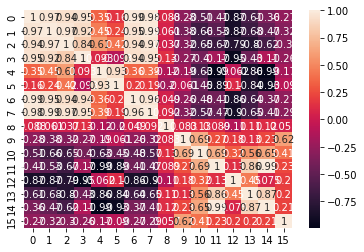

In [ ]:
df = pd.DataFrame(samples)
df2 = df.drop([16], axis=1).astype(float)
corrMatrix = df2.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

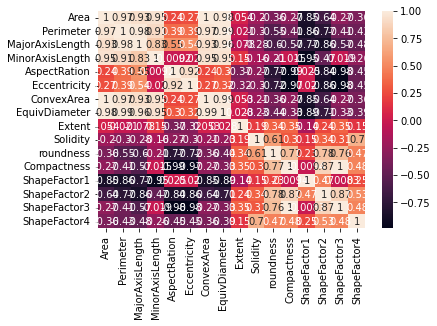

In [ ]:
corrM = beans.corr()
sn.heatmap(corrM, annot=True)
plt.show()

In [ ]:
distance(corrM, corrMatrix)

0.00698285260097667

In [ ]:
model = GAN(num_epochs=500, g_params=[512], d_params=[512], latent_dim=64)
data1, data2 = create_statistics(beans, 'Class', model=model, categorical_columns=['Class'], classification=True)

Epoch: 0 Loss Discriminator: 0.5303336977958679
Epoch: 0 Loss Generator: 0.8274015188217163
Epoch: 10 Loss Discriminator: 0.4110545516014099
Epoch: 10 Loss Generator: 1.3702032566070557
Epoch: 20 Loss Discriminator: 0.40415364503860474
Epoch: 20 Loss Generator: 1.7694284915924072
Epoch: 30 Loss Discriminator: 0.41845986247062683
Epoch: 30 Loss Generator: 1.315557837486267
Epoch: 40 Loss Discriminator: 0.40097159147262573
Epoch: 40 Loss Generator: 1.471883773803711
Epoch: 50 Loss Discriminator: 0.3810935914516449
Epoch: 50 Loss Generator: 1.5050040483474731
Epoch: 60 Loss Discriminator: 0.38649851083755493
Epoch: 60 Loss Generator: 1.4062912464141846
Epoch: 70 Loss Discriminator: 0.2710927426815033
Epoch: 70 Loss Generator: 1.841867446899414
Epoch: 80 Loss Discriminator: 0.38363879919052124
Epoch: 80 Loss Generator: 1.6424640417099
Epoch: 90 Loss Discriminator: 0.4795847535133362
Epoch: 90 Loss Generator: 1.881422758102417
Epoch: 100 Loss Discriminator: 0.4748373329639435
Epoch: 100 Los

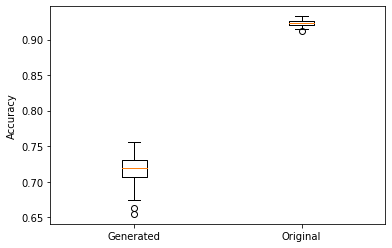

In [ ]:
plt.ylabel('Accuracy')
bp = plt.boxplot([data1, data2])
plt.xticks([1, 2], ['Generated', 'Original'])
plt.show()

In [ ]:
data1.mean()

0.7167746675483068

In [ ]:
data2.mean()

0.9238230972671172

In [19]:
model = GAN()
data1, data2 = create_statistics(beans, 'Class', model=model, categorical_columns=['Class'], classification=True, method='knn')

Epoch: 0 Loss Discriminator: 0.4819563329219818
Epoch: 0 Loss Generator: 0.8158695697784424
Epoch: 10 Loss Discriminator: 0.27600327134132385
Epoch: 10 Loss Generator: 2.3333852291107178
Epoch: 20 Loss Discriminator: 0.25379395484924316
Epoch: 20 Loss Generator: 2.5240631103515625
Epoch: 30 Loss Discriminator: 0.1931915581226349
Epoch: 30 Loss Generator: 2.7498655319213867
Epoch: 40 Loss Discriminator: 0.12539511919021606
Epoch: 40 Loss Generator: 4.149425029754639
Epoch: 50 Loss Discriminator: 0.06265243887901306
Epoch: 50 Loss Generator: 5.149791717529297
Epoch: 60 Loss Discriminator: 0.1308709681034088
Epoch: 60 Loss Generator: 4.76827335357666
Epoch: 70 Loss Discriminator: 0.10513020306825638
Epoch: 70 Loss Generator: 7.969481468200684
Epoch: 80 Loss Discriminator: 0.1745138168334961
Epoch: 80 Loss Generator: 3.08388090133667
Epoch: 90 Loss Discriminator: 0.10014954209327698
Epoch: 90 Loss Generator: 8.246912002563477
Epoch: 100 Loss Discriminator: 0.07592067867517471
Epoch: 100 Lo

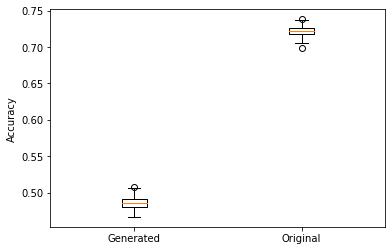

In [20]:
plt.ylabel('Accuracy')
bp = plt.boxplot([data1, data2])
plt.xticks([1, 2], ['Generated', 'Original'])
plt.show()

In [22]:
data1.mean()

0.48606641686870916

In [ ]:
data2.mean()

0.7222597707904792

# Real estate dataset

In [ ]:
real_estate = pd.read_csv('drive/MyDrive/Datasets/Real estate.csv', sep=',')

In [ ]:
real_estate.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
real_estate.shape

(414, 8)

In [ ]:
real_estate_gan = GAN(g_params=[512], d_params=[512], num_epochs = 800)

In [ ]:
real_estate_gan.fit(real_estate)

Epoch: 0 Loss Discriminator: 0.5993825197219849
Epoch: 0 Loss Generator: 0.6861655116081238
Epoch: 10 Loss Discriminator: 0.2831287980079651
Epoch: 10 Loss Generator: 1.8538473844528198
Epoch: 20 Loss Discriminator: 0.3616514801979065
Epoch: 20 Loss Generator: 2.5948338508605957
Epoch: 30 Loss Discriminator: 0.4164591133594513
Epoch: 30 Loss Generator: 2.227891445159912
Epoch: 40 Loss Discriminator: 0.4194619059562683
Epoch: 40 Loss Generator: 2.276982069015503
Epoch: 50 Loss Discriminator: 0.6404070258140564
Epoch: 50 Loss Generator: 1.2452179193496704
Epoch: 60 Loss Discriminator: 0.6675634980201721
Epoch: 60 Loss Generator: 0.9280734658241272
Epoch: 70 Loss Discriminator: 0.5377859473228455
Epoch: 70 Loss Generator: 1.0499054193496704
Epoch: 80 Loss Discriminator: 0.6187599897384644
Epoch: 80 Loss Generator: 0.9629978537559509
Epoch: 90 Loss Discriminator: 0.6543383002281189
Epoch: 90 Loss Generator: 0.9611806273460388
Epoch: 100 Loss Discriminator: 0.6220571398735046
Epoch: 100 Los

In [ ]:
samples = real_estate_gan.sample(10000)

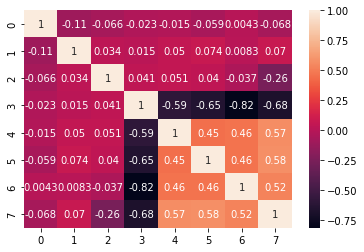

In [ ]:
df = pd.DataFrame(samples)
df2 = df.astype(float)
corrMatrix = df2.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

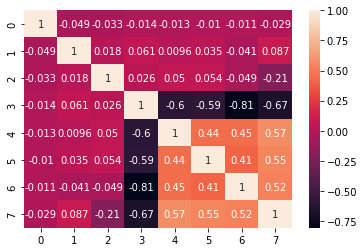

In [ ]:
d = real_estate
d = d.rename(columns={x:y for x,y in zip(d.columns,range(0,len(d.columns)))})
og_matrix = d.corr()
sn.heatmap(og_matrix, annot=True)
plt.show()

In [ ]:
distance(og_matrix, corrMatrix)

0.0037019343534203187

In [ ]:
real_estate_gan = GAN(g_params=[512], d_params=[512], num_epochs=800)
data1, data2 = create_statistics(real_estate, model=real_estate_gan, target_column='Y house price of unit area', sample_size=real_estate.shape[0])

Epoch: 0 Loss Discriminator: 0.5935354828834534
Epoch: 0 Loss Generator: 0.724964439868927
Epoch: 10 Loss Discriminator: 0.20244362950325012
Epoch: 10 Loss Generator: 2.1500391960144043
Epoch: 20 Loss Discriminator: 0.31298813223838806
Epoch: 20 Loss Generator: 2.4985079765319824
Epoch: 30 Loss Discriminator: 0.6781468987464905
Epoch: 30 Loss Generator: 1.6601223945617676
Epoch: 40 Loss Discriminator: 0.8537707328796387
Epoch: 40 Loss Generator: 1.0054770708084106
Epoch: 50 Loss Discriminator: 0.6106273531913757
Epoch: 50 Loss Generator: 1.236052393913269
Epoch: 60 Loss Discriminator: 0.5021321177482605
Epoch: 60 Loss Generator: 1.246508002281189
Epoch: 70 Loss Discriminator: 0.7151032090187073
Epoch: 70 Loss Generator: 0.7970144152641296
Epoch: 80 Loss Discriminator: 0.5575553178787231
Epoch: 80 Loss Generator: 0.986104428768158
Epoch: 90 Loss Discriminator: 0.4803144931793213
Epoch: 90 Loss Generator: 1.2241097688674927
Epoch: 100 Loss Discriminator: 0.5687448382377625
Epoch: 100 Los

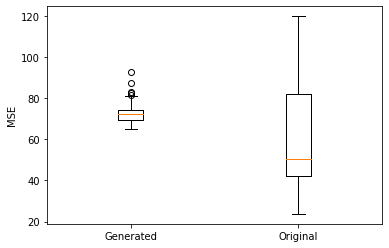

In [ ]:
plt.ylabel('MSE')
bp = plt.boxplot([data1, data2])
plt.xticks([1, 2], ['Generated', 'Original'])
plt.show()

In [ ]:
data1.mean()

72.65489370653125

In [ ]:
data2.mean()

59.85335581499999

In [ ]:
real_estate_gan = GAN(g_params=[512, 512], d_params=[512, 512], num_epochs=800)
data1, data2 = create_statistics(real_estate, model=real_estate_gan, target_column='Y house price of unit area', method='knn', sample_size=real_estate.shape[0])

Epoch: 0 Loss Discriminator: 0.25858017802238464
Epoch: 0 Loss Generator: 1.497191309928894
Epoch: 10 Loss Discriminator: 0.04413221776485443
Epoch: 10 Loss Generator: 3.9862945079803467
Epoch: 20 Loss Discriminator: 0.014221412129700184
Epoch: 20 Loss Generator: 8.086114883422852
Epoch: 30 Loss Discriminator: 0.29317712783813477
Epoch: 30 Loss Generator: 9.695476531982422
Epoch: 40 Loss Discriminator: 0.0496462844312191
Epoch: 40 Loss Generator: 16.322843551635742
Epoch: 50 Loss Discriminator: 0.5949649810791016
Epoch: 50 Loss Generator: 8.399953842163086
Epoch: 60 Loss Discriminator: 0.07722506672143936
Epoch: 60 Loss Generator: 4.273936748504639
Epoch: 70 Loss Discriminator: 0.08833394944667816
Epoch: 70 Loss Generator: 5.147493362426758
Epoch: 80 Loss Discriminator: 0.07746483385562897
Epoch: 80 Loss Generator: 5.087387561798096
Epoch: 90 Loss Discriminator: 0.03447066992521286
Epoch: 90 Loss Generator: 6.5717902183532715
Epoch: 100 Loss Discriminator: 0.0647401288151741
Epoch: 100

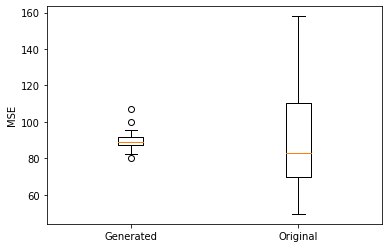

In [ ]:
plt.ylabel('MSE')
bp = plt.boxplot([data1, data2])
plt.xticks([1, 2], ['Generated', 'Original'])
plt.show()

In [ ]:
data1.mean() # 89.68703248449066

89.5649358316043

In [ ]:
data2.mean()

90.03006034615385

# Breast cancer

In [ ]:
url = 'https://raw.githubusercontent.com/JkbRnc/Data_Generators/main/datasets/breast_cancer.csv'
bc =  pd.read_csv(url, sep=',')

In [ ]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [ ]:
bc_gan = GAN(g_params =[512], d_params=[512], num_epochs = 600)

In [ ]:
bc_gan.fit(bc, ['Classification'])

Epoch: 0 Loss Discriminator: 0.6250274181365967
Epoch: 0 Loss Generator: 0.6446827054023743
Epoch: 10 Loss Discriminator: 0.250393271446228
Epoch: 10 Loss Generator: 2.149646520614624
Epoch: 20 Loss Discriminator: 0.16340306401252747
Epoch: 20 Loss Generator: 3.3444130420684814
Epoch: 30 Loss Discriminator: 0.1506427824497223
Epoch: 30 Loss Generator: 3.519282817840576
Epoch: 40 Loss Discriminator: 0.32650840282440186
Epoch: 40 Loss Generator: 3.074702739715576
Epoch: 50 Loss Discriminator: 0.5232239365577698
Epoch: 50 Loss Generator: 2.1324269771575928
Epoch: 60 Loss Discriminator: 0.5772165060043335
Epoch: 60 Loss Generator: 2.0543735027313232
Epoch: 70 Loss Discriminator: 0.5335447192192078
Epoch: 70 Loss Generator: 1.5175127983093262
Epoch: 80 Loss Discriminator: 0.604037344455719
Epoch: 80 Loss Generator: 1.1359189748764038
Epoch: 90 Loss Discriminator: 0.7071108222007751
Epoch: 90 Loss Generator: 0.9536236524581909
Epoch: 100 Loss Discriminator: 0.6194628477096558
Epoch: 100 Loss

In [ ]:
samples = bc_gan.sample(10000)
df_bc = pd.DataFrame(samples)

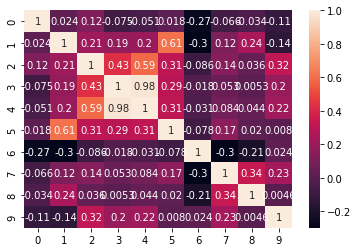

In [ ]:
sn.heatmap(df_bc.corr(), annot=True)

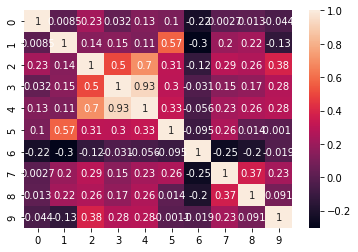

In [ ]:
d = bc
d = d.rename(columns={x:y for x,y in zip(d.columns,range(0,len(d.columns)))})
sn.heatmap(d.corr(), annot=True)

In [ ]:
distance(bc.corr(), df_bc.corr())

0.008242666299451425

In [ ]:
model=GAN(g_params=[512], d_params=[512], num_epochs=500)
data1, data2 = create_statistics(bc, 'Classification', model, ['Classification'],classification=True)

Epoch: 0 Loss Discriminator: 0.6014359593391418
Epoch: 0 Loss Generator: 0.7250152230262756
Epoch: 10 Loss Discriminator: 0.2813476324081421
Epoch: 10 Loss Generator: 1.6411058902740479
Epoch: 20 Loss Discriminator: 0.28340309858322144
Epoch: 20 Loss Generator: 2.9169042110443115
Epoch: 30 Loss Discriminator: 0.245624840259552
Epoch: 30 Loss Generator: 2.5229978561401367
Epoch: 40 Loss Discriminator: 0.8771358132362366
Epoch: 40 Loss Generator: 1.4029227495193481
Epoch: 50 Loss Discriminator: 0.4049694240093231
Epoch: 50 Loss Generator: 2.369656801223755
Epoch: 60 Loss Discriminator: 0.34916016459465027
Epoch: 60 Loss Generator: 2.275646686553955
Epoch: 70 Loss Discriminator: 0.3690374195575714
Epoch: 70 Loss Generator: 2.011479616165161
Epoch: 80 Loss Discriminator: 0.3873511254787445
Epoch: 80 Loss Generator: 1.8140718936920166
Epoch: 90 Loss Discriminator: 0.4701344072818756
Epoch: 90 Loss Generator: 1.5479118824005127
Epoch: 100 Loss Discriminator: 0.668526291847229
Epoch: 100 Loss

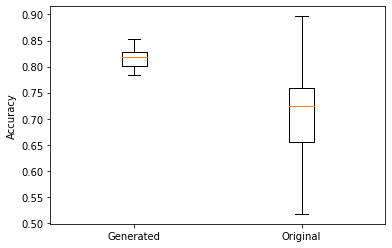

In [ ]:
plt.ylabel('Accuracy')
bp = plt.boxplot([data1, data2])
plt.xticks([1, 2], ['Generated', 'Original'])
plt.show()

In [ ]:
data1.mean()

0.8158620689655172

In [ ]:
data2.mean()

0.7182758620689655

In [ ]:
model=GAN(g_params=[512], d_params=[512], num_epochs=500)
data1, data2 = create_statistics(bc, 'Classification', model, ['Classification'],classification=True, method='knn')

Epoch: 0 Loss Discriminator: 0.5892760157585144
Epoch: 0 Loss Generator: 0.6967378258705139
Epoch: 10 Loss Discriminator: 0.29172250628471375
Epoch: 10 Loss Generator: 1.6070551872253418
Epoch: 20 Loss Discriminator: 0.4488767683506012
Epoch: 20 Loss Generator: 2.1009280681610107
Epoch: 30 Loss Discriminator: 0.3475450873374939
Epoch: 30 Loss Generator: 2.220881462097168
Epoch: 40 Loss Discriminator: 0.42956262826919556
Epoch: 40 Loss Generator: 2.811591625213623
Epoch: 50 Loss Discriminator: 0.43909570574760437
Epoch: 50 Loss Generator: 2.0586047172546387
Epoch: 60 Loss Discriminator: 0.6150133609771729
Epoch: 60 Loss Generator: 1.8939887285232544
Epoch: 70 Loss Discriminator: 0.6327661275863647
Epoch: 70 Loss Generator: 1.350623607635498
Epoch: 80 Loss Discriminator: 0.6393368244171143
Epoch: 80 Loss Generator: 1.2863681316375732
Epoch: 90 Loss Discriminator: 0.5705519318580627
Epoch: 90 Loss Generator: 1.1699631214141846
Epoch: 100 Loss Discriminator: 0.6519477963447571
Epoch: 100 L

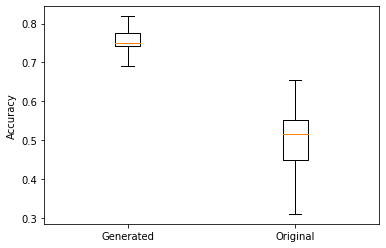

In [ ]:
plt.ylabel('Accuracy')
bp = plt.boxplot([data1, data2])
plt.xticks([1, 2], ['Generated', 'Original'])
plt.show()

In [ ]:
data1.mean()

0.7529310344827584

In [ ]:
data2.mean()

0.4989655172413793

# WSNs dataset

In [ ]:
url = 'https://raw.githubusercontent.com/JkbRnc/Data_Generators/main/datasets/wsns.csv'
wsns = pd.read_csv(url, sep=',')

In [ ]:
wsns = wsns.drop(['sd_ale'], axis=1)

In [ ]:
wsns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anchor_ratio  107 non-null    int64  
 1   trans_range   107 non-null    int64  
 2   node_density  107 non-null    int64  
 3   iterations    107 non-null    int64  
 4   ale           107 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 4.3 KB


In [ ]:
wsns.shape[0]

107

In [ ]:
model=GAN(g_params=[512], d_params=[512], num_epochs=500)
data1, data2 = create_statistics(wsns, 'ale', model, classification=False, sample_size=wsns.shape[0])

Epoch: 0 Loss Discriminator: 0.5981810092926025
Epoch: 0 Loss Generator: 0.745749831199646
Epoch: 10 Loss Discriminator: 0.3485385775566101
Epoch: 10 Loss Generator: 1.5447964668273926
Epoch: 20 Loss Discriminator: 0.630682110786438
Epoch: 20 Loss Generator: 1.4843037128448486
Epoch: 30 Loss Discriminator: 0.7908227443695068
Epoch: 30 Loss Generator: 1.4521892070770264
Epoch: 40 Loss Discriminator: 0.5400393605232239
Epoch: 40 Loss Generator: 1.4057326316833496
Epoch: 50 Loss Discriminator: 0.7097017765045166
Epoch: 50 Loss Generator: 0.7516564130783081
Epoch: 60 Loss Discriminator: 0.7032806277275085
Epoch: 60 Loss Generator: 0.8873865604400635
Epoch: 70 Loss Discriminator: 0.6403943300247192
Epoch: 70 Loss Generator: 0.8172905445098877
Epoch: 80 Loss Discriminator: 0.7002123594284058
Epoch: 80 Loss Generator: 0.7828128933906555
Epoch: 90 Loss Discriminator: 0.645848274230957
Epoch: 90 Loss Generator: 0.8725481629371643
Epoch: 100 Loss Discriminator: 0.5787776708602905
Epoch: 100 Loss

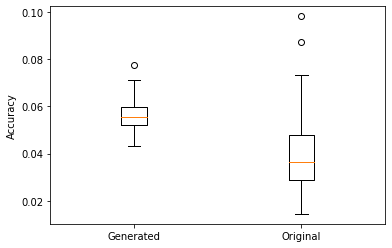

In [ ]:
plt.ylabel('Accuracy')
bp = plt.boxplot([data1, data2])
plt.xticks([1, 2], ['Generated', 'Original'])
plt.show()

In [ ]:
data1.mean()

0.056350277688990674

In [ ]:
data2.mean()

0.041350342543204084

In [ ]:
d = model.sample(100)

In [ ]:
d

In [ ]:
model=GAN(g_params=[512], d_params=[512], num_epochs=500)
data1, data2 = create_statistics(wsns, 'ale', model, classification=False, method='knn')

Epoch: 0 Loss Discriminator: 0.6022962331771851
Epoch: 0 Loss Generator: 0.7414111495018005
Epoch: 10 Loss Discriminator: 0.3732163608074188
Epoch: 10 Loss Generator: 1.64341402053833
Epoch: 20 Loss Discriminator: 0.4891866147518158
Epoch: 20 Loss Generator: 2.2432241439819336
Epoch: 30 Loss Discriminator: 0.6647080779075623
Epoch: 30 Loss Generator: 1.7475559711456299
Epoch: 40 Loss Discriminator: 0.7377883791923523
Epoch: 40 Loss Generator: 1.6069082021713257
Epoch: 50 Loss Discriminator: 0.6266313195228577
Epoch: 50 Loss Generator: 1.1252750158309937
Epoch: 60 Loss Discriminator: 0.569932222366333
Epoch: 60 Loss Generator: 0.9846132397651672
Epoch: 70 Loss Discriminator: 0.5577677488327026
Epoch: 70 Loss Generator: 0.9954109787940979
Epoch: 80 Loss Discriminator: 0.5595237612724304
Epoch: 80 Loss Generator: 0.9650240540504456
Epoch: 90 Loss Discriminator: 0.6151583790779114
Epoch: 90 Loss Generator: 0.9163560271263123
Epoch: 100 Loss Discriminator: 0.6698775291442871
Epoch: 100 Loss

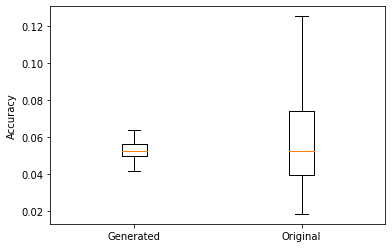

In [ ]:
plt.ylabel('Accuracy')
bp = plt.boxplot([data1, data2])
plt.xticks([1, 2], ['Generated', 'Original'])
plt.show()

In [ ]:
data1.mean()

0.052848249679485565

In [ ]:
data2.mean()

0.05957713609200682

In [ ]:
samples= model.sample(10000)

In [ ]:
df = pd.DataFrame(samples)

In [ ]:
distance(wsns.corr(), df.corr())

0.012465140807131897

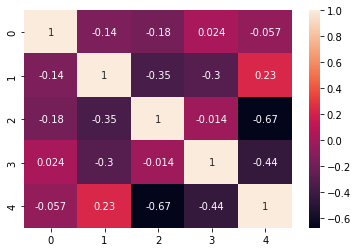

In [ ]:
sn.heatmap(df.corr(), annot=True)